In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

fb = pd.read_csv('data/facebook.csv')
ms = pd.read_csv('data/microsoft.csv')

# Population and Sample
**Population** is a group of individuals who have something in common. We may be interested in some properties about a certain group (target population) that cannot be observed completely.

**Sample** is a small group of members of a population selected to represent the population
- Must be randomly selected (through random sampling)


## Two kinds of sampling
**Sampling without replacement**
- A population individual can be selected only one time
- Without putting it back to the population
- Good for big populations, where we don't want duplicates

**Sampling with replacement**
- A randomly selected individual will be put back before the next one being selected
- A population element can eb selected more than one time
- Good for a small popuation, where everyone in the population has the same chance of being selected

In [4]:
# Create an empty DataFrame with one column
data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

# Perform sampling from the population by drawing five individuals randomly without replacement
a_sample_without_replacement = data['Population'].sample(5, replace = False)

# Perform sampling from the population by drawing five individuals randomly with replacement
a_sample_with_replacement = data['Population'].sample(5, replace = True)

In [5]:
a_sample_without_replacement

8    50
9    60
6    72
3    20
7    16
Name: Population, dtype: int64

For sampling without replacement, there are no duplicate numbers and index numbers

In [6]:
a_sample_with_replacement

2    85
7    16
4    19
4    19
9    60
Name: Population, dtype: int64

For sampling with replacement, it's possible to see the same individual drawn for multiple times

## Parameters and Statistics
**Parameters**

Characteristics or summary numbers of populations

Fixed values

- Mean
- Variance
- Standard deviation

**Statistics**

Characteristics or summary numbers of samples

Values changes in different samples, even if they're drawn from the same population

- Sample mean
- Sample variance 
- Sample standard deviation

In [7]:
# Print out the parameters of the population 
print('Population mean is ', data['Population'].mean())
print('Population variance is ', data['Population'].var(ddof=0))
print('Population standard deviation is ', data['Population'].std(ddof=0))
print('Population size is ', data['Population'].shape[0])
# DDOF - denominator of the population variance N
# ddof = 1, denominator of a sample variance has to be n - 1 instead of n, which is the sample size

Population mean is  43.0
Population variance is  571.8
Population standard deviation is  23.912339910598458
Population size is  10


$$\mu = \frac{\sum_{i=1}^{N} x_i}{N}$$ 

$$\sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}$$


In [8]:
sample_length = 500
sample_variance_collection0 = [data['Population'].sample(50, replace = True).var(ddof=0) for i in range(sample_length)]
sample_variance_collection1 = [data['Population'].sample(50, replace = True).var(ddof=1) for i in range(sample_length)]

print('Population variance is ', data['Population'].var(ddof=0))
print('Average of sample variance with n is', pd.DataFrame(sample_variance_collection0)[0].mean())
print('Average of sample variance with n-1 is', pd.DataFrame(sample_variance_collection1)[0].mean())

Population variance is  571.8
Average of sample variance with n is 565.6278599999999
Average of sample variance with n-1 is 574.406521632653


You can see that n-1 is closer to the population variance.

The average of sample variance using n as the denominator is always smaller than population variance.

n-1 is called degrees of freedom

## Degrees of Freedom

The number of values in calculation that are free to variate.

When we use the sample mean to compute the sample variance, we will lose one degree of freedom.

For example, consider a sample size of 3 with a sample mean of 100.

$$n = 3, \bar{x} = 100$$

$$x_1 \rightarrow 90$$

$$x_2 \rightarrow 80$$

$$x_3 \rightarrow \text{not free}$$

The third is not free to variate because of the constraint of sample mean 

$$\frac{90+80+x_3}{3}=100$$

$$x_3 = 130$$

The only choice for a third number is 130.

When we compute variance, using degrees of freedom is better than using sample size in the sense that the average of estimator will be equal to population variance, which is called an unbiased estimator.



# Variance of Sample

How close are the statistics to population parameters?

## Sampling from normal distribution
Here, we take a sample, when sample size is 30 from a population with a normal distribution, mean equal to 10, and a standard deviation equal to 5.

In [9]:
Fstsample = pd.DataFrame(np.random.normal(10, 5, size = 30))
print('Sample mean is ', Fstsample[0].mean())
print('Sample SD is ', Fstsample[0].std(ddof=1))

Sample mean is  10.6361187967874
Sample SD is  5.11423872340939


Everytime we run this, we get different means and standard deviation. This is called the variation of sample. 

Furthermore, the sample mean and the standard deviation do not change arbitrarily.

## Empirical distribution of sample mean and variance
We generate 1,000 samples from the same population. 

We got mean and variance for each sample and saved them into a DataFrame collection:

`meanlist` [$\bar{x}_1, \bar{x}_2, \bar{x}_3, ..., ..., ...$]

`varlist` [$s_1, s_2, s_3, ..., ..., ...$]

In [10]:
meanlist = []
varlist = []
for t in range(1000):
    sample = pd.DataFrame(np.random.normal(10, 5, size = 30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

collection = pd.DataFrame()
collection['meanlist'] = meanlist
collection['varlist'] = varlist

`meanlist` is a name of a list to save sample means of 1,000 samples. 

`varlist` is a name of a list to save sample variances of 1,000 samples.

Then, we will generate 1,000 samples in a loop. 

For each sample, we calculate the mean and variance and save them into `meanlist` and `varlist`

Finally, we build an empty DataFrame called `collection`. The same `meanlist` and `varlist` in different columns of this DataFrame.


<Axes: >

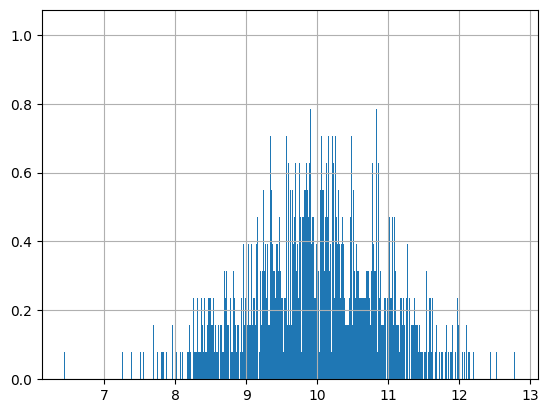

In [11]:
collection['meanlist'].hist(bins=500, density=True)

The histogram for the collection of sample means looks symmetric and like a normal distribution

<Axes: >

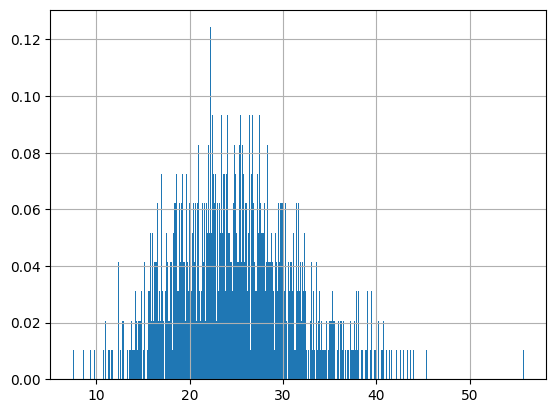

In [12]:
collection['varlist'].hist(bins=500, density=True)

The histogram of sample variance is not normal. As you can see, it's right-skewed.

We can mathematically prove that the sample mean has a normal distribution.

If population is normal with mean equal to $\mu$ and a variance equal to $\sigma^2$, 

$$N(\mu, \sigma^2)$$

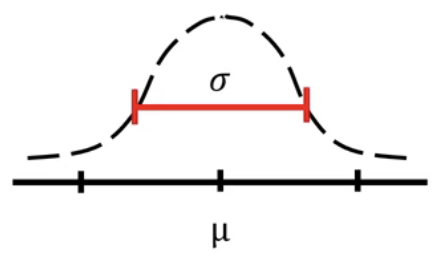

then the sample mean is also normal, with mean equal to $\mu$ and variance equal to $\frac{\sigma^2}{n}$ where $n$ is the sample size

$$N(\mu, \frac{\sigma^2}{n})$$

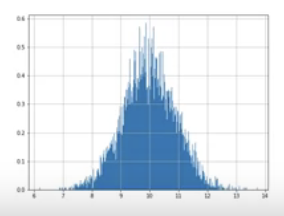

## So why is the variance of sample mean smaller than the variance of the population? 

Intuitionally, the sample mean is the average of $N$ individuals of the population and hence the variation of sample mean is smaller than the variation of individuals in the population.

Here is a demonstration in Python

<Axes: >

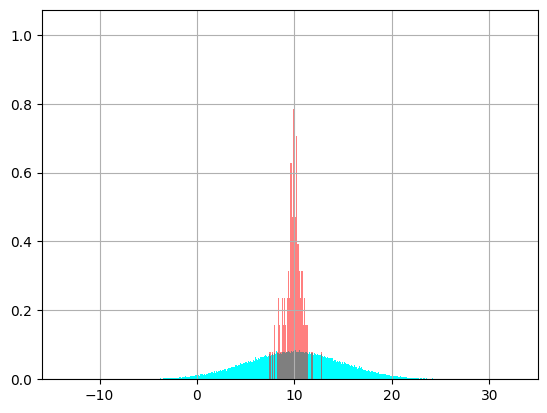

In [13]:
# Generate a population sample from a normal distribution
pop = pd.DataFrame(np.random.normal(10, 5, size=100000)) # approximate to population

# Plotting the histogram for the population
pop[0].hist(bins=500, color='cyan', density=True)

# Plotting the histogram for the mean list
collection['meanlist'].hist(bins=500, density=True, color='red', alpha=0.5)

The blue histogram is for the population (population distribution), the red one is for the sample mean (empirical distribution).

## What if the population is not normal?

**Central limit theorem**: if the sample size is large enough, the distribution of sample mean is approximately normal with $N(\mu,\frac{\sigma^2}{n})$

Hence, we can conclude it this way: Even if the population is not normal, the sample is approximately normal if the sample size is large enough.

### Sampling from general distribution (population is not normal)

In [14]:
samplemeanlist = []
apop = pd.DataFrame([1, 0, 1, 0, 1])
for t in range(100000):
    sample = apop[0].sample(10, replace = True) # Small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist

`apop` is a `DataFrame` which saves the population. In this population, we only have 5 values: `[1, 0, 1, 0, 1]`. 

We can generate 100,000 samples with small sample size 10. 

<Axes: >

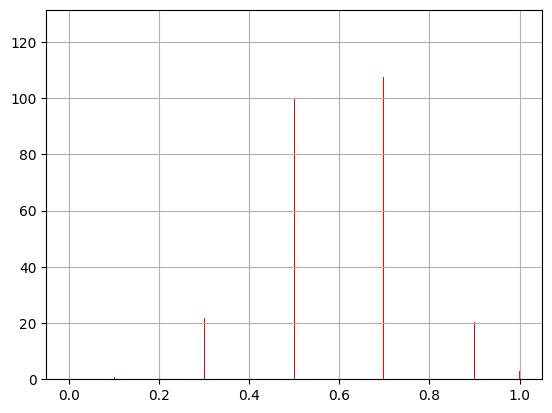

In [15]:
acollec['meanlist'].hist(bins = 500, color = 'red', density = True)

In this histogram for sample means, it does not look like a normal distribution. 

In [16]:
samplemeanlist = []
apop = pd.DataFrame([1, 0, 1, 0, 1])
for t in range(100000):
    sample = apop[0].sample(2000, replace = True) # Small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist

But if you generate 100,000 samples with large sample size 2,000, the distribution of sample mean now looks like a normal distribution.

<Axes: >

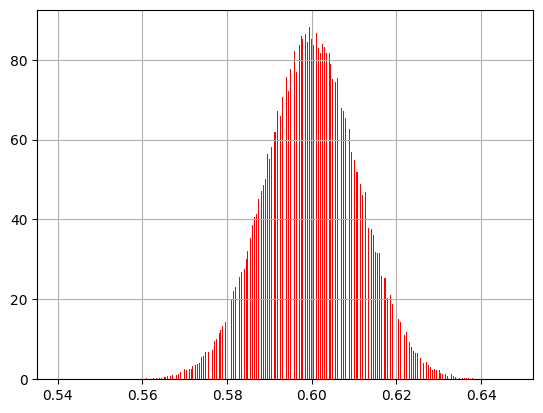

In [17]:
acollec['meanlist'].hist(bins = 500, color = 'red', density = True)

# Confidence Interval

How to estimate the average return using confidence interval

## Sample log return of Apple

In [18]:
aapl = pd.read_csv('data/apple.csv')
aapl['logReturn'] = np.log(aapl['Close'].shift(-1)) - np.log(aapl['Close'])

We can get average return in this sample. We can sample mean to estimate the real average return, which is the population mean.

## Making inference using data

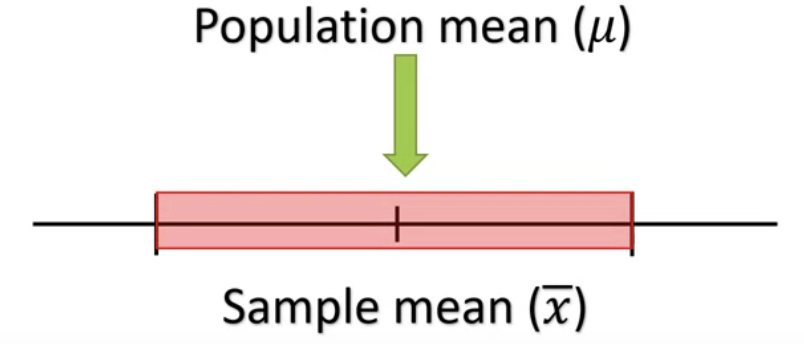

Intuitively, if a sample is a good representative of the population, the population mean should be close to sample mean. It's plausible to say that the population mean is in a range with sample mean centered.

## Confidence interval

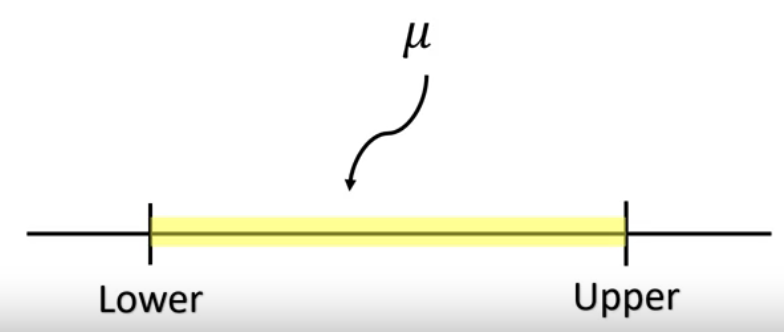

Our goal is to estimate population mean using an interval with lower and upper bounds.

## Distribution of sample mean

To start, we need to standardize sample mean because sample has different mean and standard deviation. 

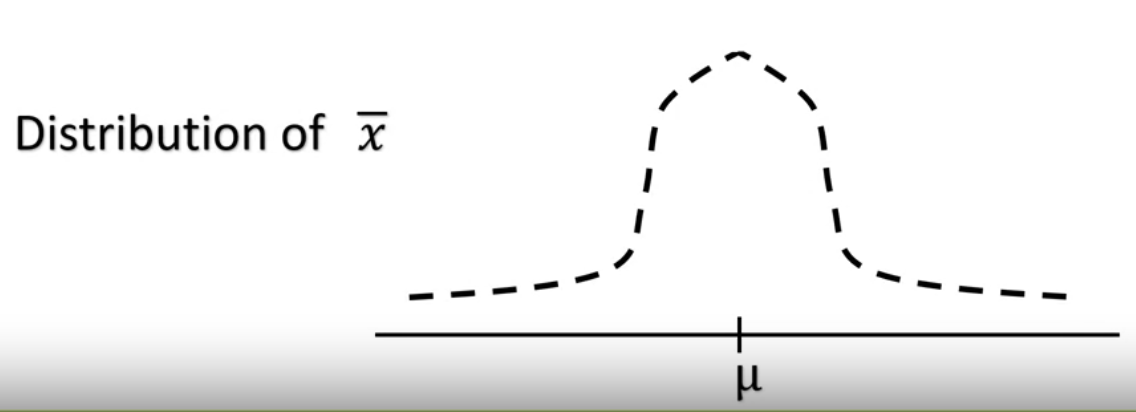

Recall that the distribution of sample mean is normal. 

## Standardize a normal random variable

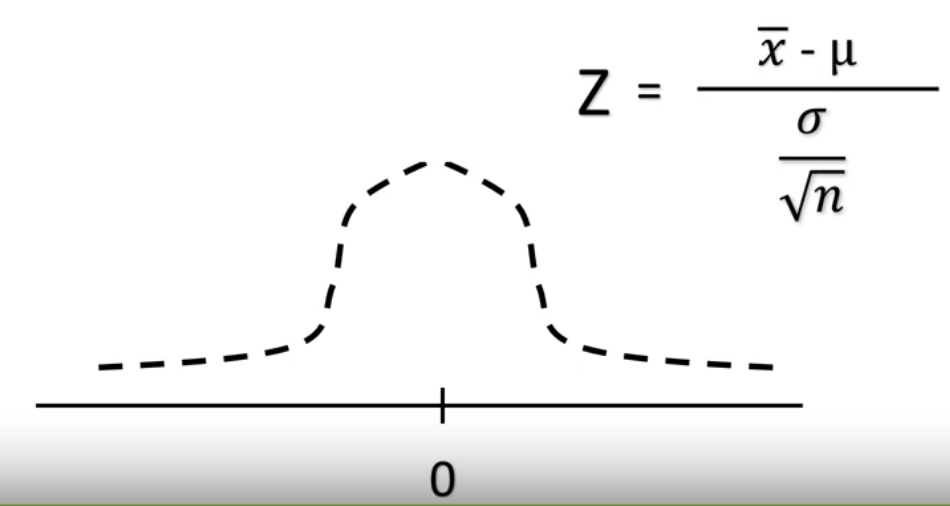

We can standardize sample mean by minus its mean, which is identical to population mean and then divided by its standard deviation, which is the standard deviation of the population divided by the square root of sample size.

After standardization, it'll become standard normal, and follows Z-distribution. 

For Z-distribution, it's not difficult to find the two quantiles.

## Quantiles of Z distribution

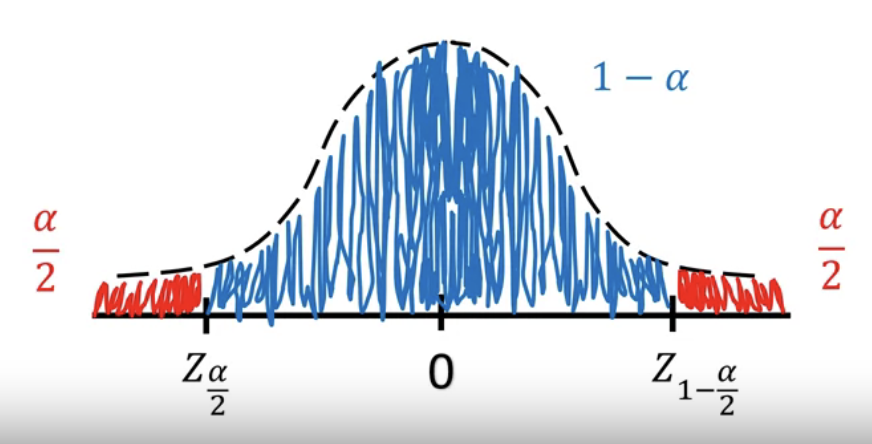

Since the distribution is symmetric, the magnitudes of these two quantiles are the same except the sign

Then we have $Z_{1-\frac{a}{2}}=-Z_{\frac{a}{2}}$

## Confidence interval

Since the standardization form of sample mean is also $Z$, then we have this equation.

$$P\left(Z_{\frac{\alpha}{2}}\le\frac{\overline{x}-\mu}{\frac{\sigma}{\sqrt{n}}}\le Z_{1-\frac{\alpha}{2}}\right)=1-\alpha$$

By doing the calculations in the parentheses, we get the following equation, which explicity gives the upper and lower bounds for population mean: 

$$P\left(\bar{X} - Z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{X} + Z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\right) = 1 - \alpha$$

Since $\sigma$ is the population standard deviation, it's usually unknown. So we can replace it instead using the sample standard deviation if sample size is large enough.

The interval here, for $\mu$ is called confidence interval at the level of $1-\alpha$


## Confidence interval for daily return

To build the interval for the average return, we need to find quantiles of mean distribution. We can use `norm.ppf` to get the quantiles.

In [19]:
aapl = pd.read_csv('data/apple.csv')
aapl['logReturn'] = np.log(aapl['Close'].shift(-1)) - np.log(aapl['Close'])

# Values for calculating the 80% confidence interval
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)
sample_mean = aapl['logReturn'].mean()
sample_std = aapl['logReturn'].std(ddof=1) / (aapl.shape[0])**0.5

interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std
print("Sample Mean is ", sample_mean)
print("********************************************")
print("80% confidence interval is ")
print(interval_left, interval_right)

Sample Mean is  0.000975467759150088
********************************************
80% confidence interval is 
0.0004927367254936755 0.0014581987928065005


Average return of Apple stocks falls in this interval with 80 percent chance.

Notice, this interval is on the positive side. It implies that the average return is very likely to be positive

# Hypothesis Testing

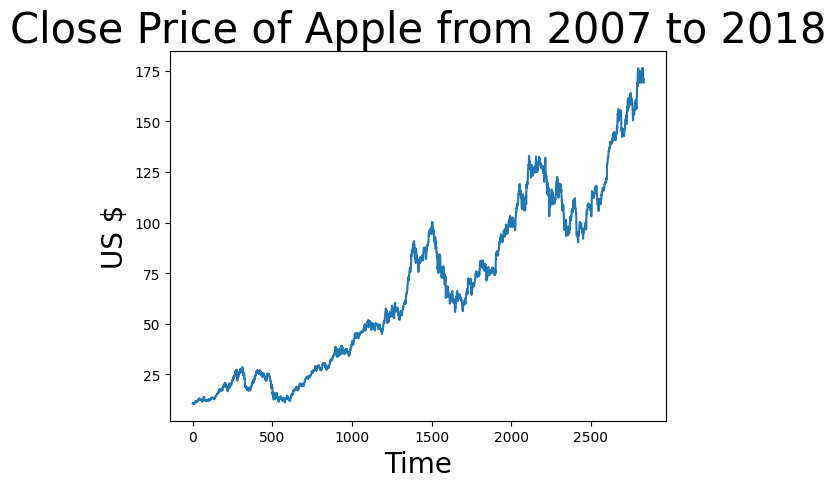

In [20]:
plt.title("Close Price of Apple from 2007 to 2018", size = 30)
plt.xlabel("Time", size = 20)
plt.ylabel("US $", size = 20)
plt.plot(aapl.loc[:, 'Close'])

This is a daily close price of Apple from 2007 to 2018. 

Because the graph is rising, we may guess the average of daily return is positive.

However, if we plot the daily return directly, the daily return goes positive, negative. And our assertion that 'the average of daily return is positive' is not obvious

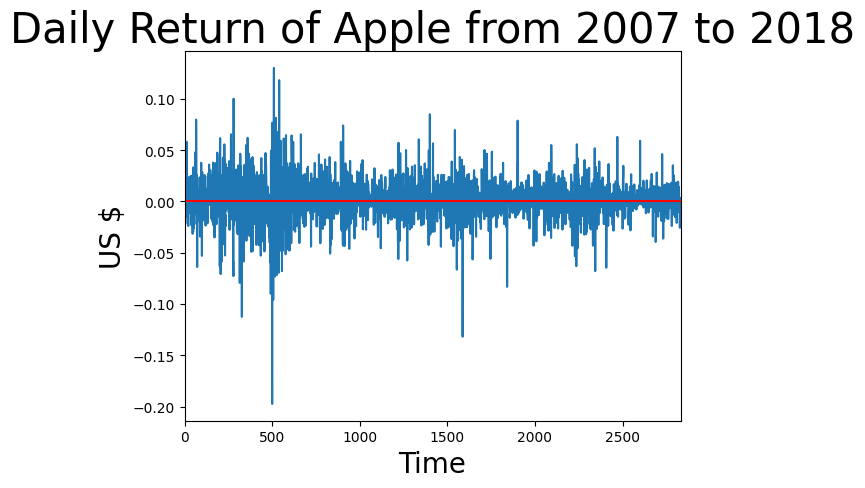

In [21]:
plt.title("Daily Return of Apple from 2007 to 2018", size = 30)
plt.xlabel("Time", size = 20)
plt.ylabel("US $", size = 20)
plt.xlim(aapl.index[0], aapl.index[-1])
plt.plot(aapl.loc[:, 'logReturn'])
plt.axhline(0, color = 'red')

It's also not obvious whether the average of daily return is 0 or not. 

<Axes: title={'center': 'Histogram of Daily Return of Apple from 2007 to 2018'}>

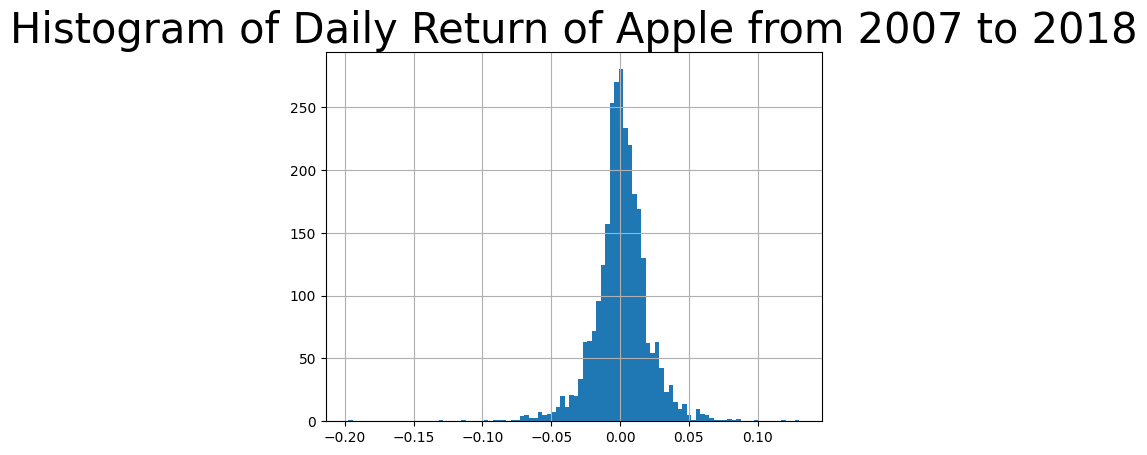

In [22]:
plt.title("Histogram of Daily Return of Apple from 2007 to 2018", size = 30)
aapl.loc[:, 'logReturn'].dropna().hist(bins = 100)

In the daily return histogram, it is approximately symmetric above 0. 

It's still not obvious whether the average daily return is different from 0.

We want to use a quantitative statistical tool to make judgement about the assertion that the average daily return is not 0.

**Hypothesis testing** can use sample information to test the validity of conjectures about these parameters

## Setting hypothesis

The first step is to set the hypotheses:

- **Null hypothesis** $H_0$: the assertion we are against

- **Alternative hypothesis** $H_a$: a conclusion we accept whenever we reject the null 

In our example:
 - $H_0$: the population mean, the average daily return is 0, $\mu=0$
 
 - $H_a$: the average daily return is not equal to 0, $\mu\neq0$

 Whether to reject or not reject the null hypothesis is a sample-based decision.

 Intuitionally, given that the null is correct, the difference between sample statistic $\bar{x}$ and the population parameter $\mu$ cannot be very large
 
 $$|\bar{x}-\mu| \rightarrow \text{Not very large}$$

 If the difference is significantly large, the null should be incorrect and we should accept the alternative. 
 
 To measure the magnitude of difference, we also need to consider the standard deviation of the sample, because the sample with a large standard deviation usually its magnitude is larger, hence we need to do standardization.

 $$\text{Standardization: } \hat{z} = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}$$

 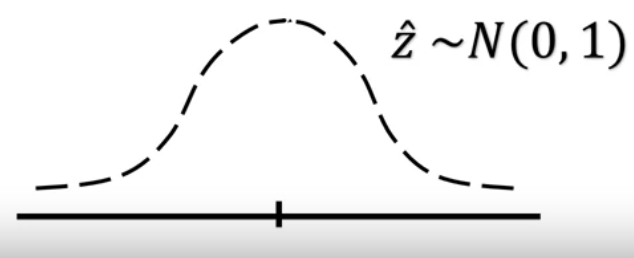
 
 If a $\hat{z}$ is far away from 0, then the null is not likely to be true.

 In hypothesis testing, we start with the assumption that the null is correct. Hence, we know population mean is equal to 0. 
 
 But in most situations, population standard deviation is not know. Then we can replace population standard devation with the sample standard deviation.

 Then this new term, denoted as $\hat{t}$ has a new distribution, t-distribution. Similar to z-distribution, t-distribution is a symmetric with respect to 0 and a bell-shaped. The difference lies in the tail. T-distribution has flat tails, which implies t has a higher chance to take the values in the two tails

 $$\hat{t} = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

 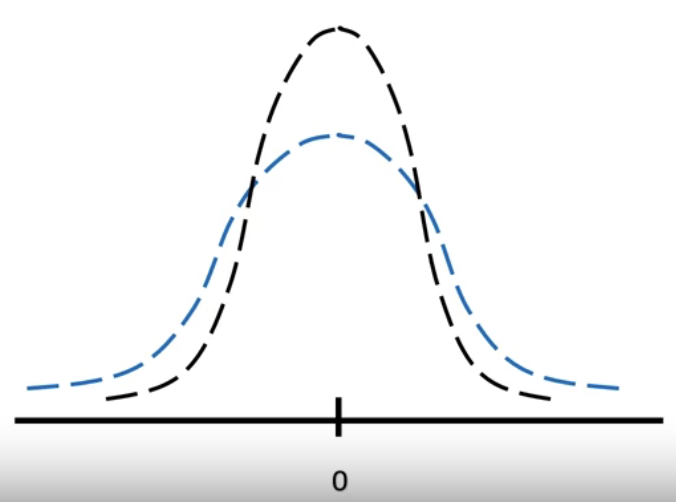

T-distribution is dependent on degrees of freedom. As sample size increases, so does degrees of freedom, and the more t is more and more like z-distribution. So with a large sample, we can treat t as if it was a z-distribution.

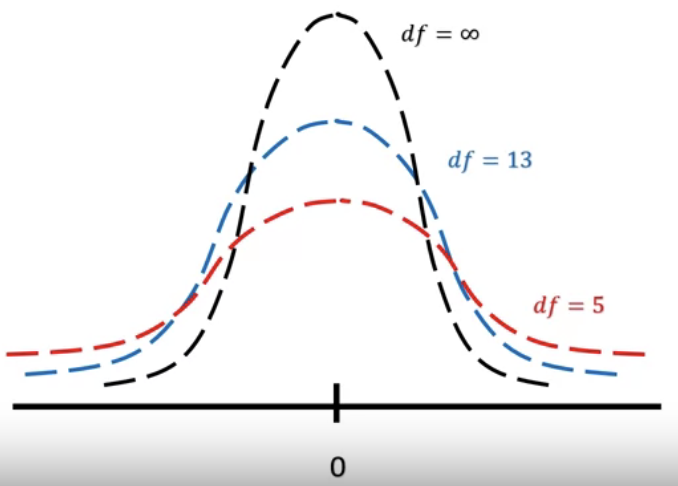



## Standardization

With large sample, $\hat{t}$ follows z-distribution hence we denote this statistic using $\hat{z}$ too.

We can compute $\hat{z}$ using Python


In [23]:
xbar = aapl['logReturn'].mean()
s = aapl['logReturn'].std(ddof=1)
n = aapl['logReturn'].shape[0]
zhat = (xbar - 0) / (s / (n**0.5))
print(zhat)

2.5896661841029576


We use $\mu = 0$ because we assume the null is correct at the beginning.

If $\hat{z}$ is different from 0 significantly, we can infer that this sample is not sampled for the population with mean equal to 0. Then, we can reject the null.

## Set Decision Criteria

To find the significance level, we can use the probability on the two tails of a z-distribution. 

We fixed the significance level, for example $\alpha = 5%$, which is the probability for $z$ to take the values of some demands of the two tails. 

We can see that these two demands is $z$ less than -1.96 and $z$ bigger than 1.96. -1.96 and 1.96 are 2.5% and 97.5% quantiles of $z$. These two demands are called **rejection regions** and this kind of test is called **two-tailed test**. If statistic $\hat{z}$ falls into the rejection region, we can tell that the statistics is far away from 0 significantly and that we can reject the null. Here, we should notice that $\hat{z}$ is also possible to take values in rejection region even if the null is correct and the $\mu=0$. This chance is equal to $\alpha = 5%$. In other words, we have a 5% chance to reject the null wrongly. This is called a **Type 1 Error** and the probability of getting a Type 1 error is identical to the level of significance level. If the significance level is small, the probability of a Type 1 Error is smaller.

At $\alpha = 5%$, reject $H_0$ if $\hat{z}>1.96$ or $\hat{z}<-1.96$

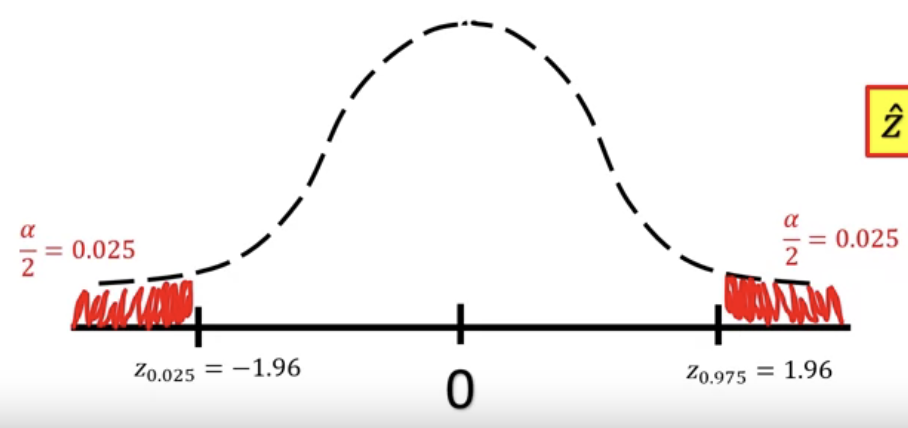

The following code demonstrates how to get the quantiles, which is also called **critical values**.

In [24]:
alpha = 0.05
zleft = norm.ppf(alpha / 2, 0, 1)
zright = -zleft
print(zleft, zright)
print('At the significance level of ', alpha)
print('Shall we reject?:', zhat > zright or zhat < zleft)

-1.9599639845400545 1.9599639845400545
At the significance level of  0.05
Shall we reject?: True


We will reject the null hypothesis, in favor that the average daily return is not equal to 0. Our conclusion may be wrong, but it happens only with 5% probability.

## Hypothesis for One Tail Test

We may want to further demonstrate that the average return is in fact positive. So we'll need another kind of test.

In the one tail test, the null is the average daily return is less than or equal to zero, which we are against. The alternative hypothesis, the average daily return is positive

$$H_0: \mu \leq 0$$

$$H_a: \mu > 0$$

First, take $\mu=0$. We still need to standardize sample mean, which is the average daily return in the sample. If $\hat{z}$ is significantly large, which implies that the sample mean is a positive comparing to $\mu = 0$. Hence it is not likely to be sampled from population, which may be equal to 0. It is also not likely to be sampled from population with $-\mu$. Similarly, we fix significance level $\alpha$ and identify the rejection region using z-distribution, which is $\hat{z} > z_\alpha$ (reject $H_0$ under this condition)

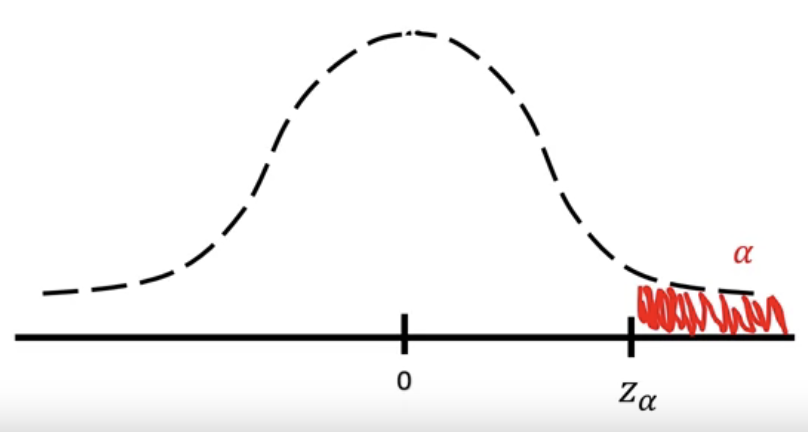



## Set Decision Criteria of One Tail Test

Using Python, we can show that the null is rejected under the 5% significance level.

In [25]:
alpha = 0.05
zright = norm.ppf(1 - alpha, 0, 1)
print(zleft, zright)
print('At the significance level of ', alpha)
print('Shall we reject?:', zhat>zright)

-1.9599639845400545 1.644853626951472
At the significance level of  0.05
Shall we reject?: True


This means that the average daily return of a population is indeed positive

## Conclusion: Two Tails vs One Tail Tests

### Two Tails Test

$$H_0: \mu = 0$$
$$\text{Reject if } \hat{z}>z_\frac{\alpha}{2} \text{ or } \hat{z}<-z_\frac{\alpha}{2}$$

### One Tail Test

$$H_0: \mu \leq 0$$
$$\text{Reject if } \hat{z}>z_\alpha$$

$$H_0: \mu \geq 0$$
$$\text{Reject if } \hat{z}<-z_\alpha$$

## P-value of Two Tails Test

A more popular way of testing is to compute p-value. We know that given the null is correct, standardized sample mean follows z-distribution.

What is the probability for this distribution to take values more extreme than our observation in the given sample? This is a p-value. If p is less than alpha, which is a threshold, it meaks that the null is unlikely to be true. With a p-value, we only need to compare it with alpha, although the way to compute the p-value is different.

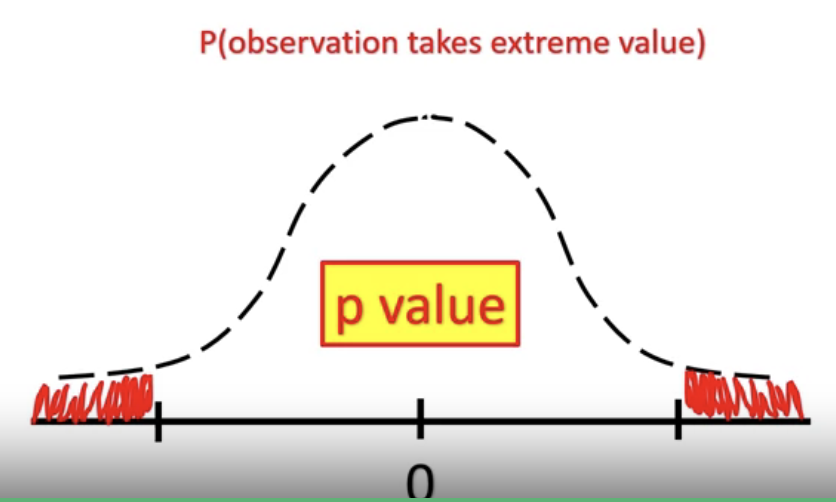

Reject $H_0$ if $\text{p-value} < \alpha$

In [26]:
alpha = 0.05
p = 1 - (norm.cdf(abs(zhat), 0, 1))
print('At the significance level of ', alpha)
print('Shall we reject: ', p < alpha)

At the significance level of  0.05
Shall we reject:  True


## P-value typo from video

- If $H_a$: $\mu \neq 0$, it is two tail test and `p = 2(1 - norm.cdf(np.abs(z), 0, 1))`
- If $H_a$: $\mu>0$, it is upper tail test and `p = 1 - norm.cdf(z, 0, 1)`
- If $H_a$: $\mu<0$, it is lower tail test and `p = norm.cdf(z, 0, 1)`